In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv',  delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter  = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')


In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)           
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

#Data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [25]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


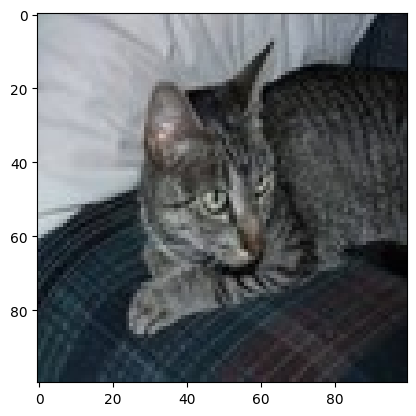

In [26]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\prakh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


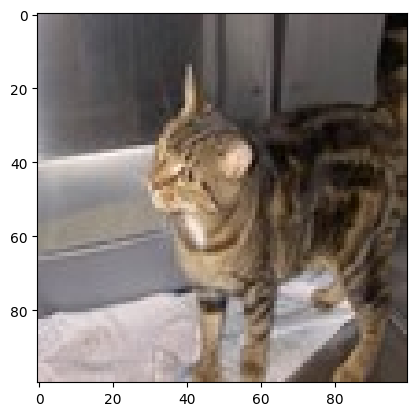

In [28]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [29]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32),
        epochs = 30,
        validation_data = (X_test, Y_test),
        verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.4910 - loss: 0.7249 - val_accuracy: 0.5550 - val_loss: 0.6929
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.5185 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6835
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.5225 - loss: 0.6936 - val_accuracy: 0.5625 - val_loss: 0.6908
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.5060 - loss: 0.6920 - val_accuracy: 0.5125 - val_loss: 0.6777
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5715 - loss: 0.6796 - val_accuracy: 0.5975 - val_loss: 0.6520
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.5610 - loss: 0.6731 - val_accuracy: 0.5225 - val_loss: 0.6819
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5285 - loss: 0.6834 - val_accuracy: 0.5875 - val_loss: 0.6713
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.5795 - loss: 0.6730 - val_accu

In [32]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7875 - loss: 0.5010


[0.5009787082672119, 0.7875000238418579]

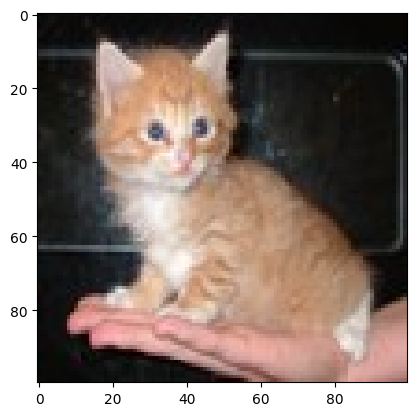

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Our model says it is a : cat


In [33]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [ ]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
